<a href="https://colab.research.google.com/github/jesusandresbaez/Demanda_de_analisis_clinicos/blob/master/Demanda_de_analisis_clinicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. Conectamos con la nube de Google 

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


###2. Importamos las librerias que utilizaremos

In [ ]:
import pandas as pd
import numpy as np
from seaborn import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

###3. Importamos nuestros DataFrames

In [ ]:
df20 = pd.read_csv('/content/drive/MyDrive/Marca Personal/Data Sicence/Laboratorio 2020/df20.csv')
df19 = pd.read_csv('/content/drive/MyDrive/Marca Personal/Data Sicence/Laboratorio 2020/df19.csv')
df21 = pd.read_csv('/content/drive/MyDrive/Marca Personal/Data Sicence/Laboratorio 2020/df21.csv')

### 3. Concatenamos los DataFrames
Incluye una variable llamada "Periodo" a cada DataFrame que indiqué si el dataframe pertenece al 2019 o al 2020. Esto ayudará a saber si la fila de registros pertenece al 2019 o 2020 al unir los DataFrames.

In [ ]:
df20['Periodo']='2020'
df19['Periodo']='2019'
df21['Periodo']='2021'
df = pd.concat([df19, df20, df21], ignore_index=True)

###4. Analizando las variables del Dataset creado

- Aplicamos el método ".dtypes" a nuestro Dataset
- Tenemos que cambiar las variables "Fecha" porque se muestra como tipo "objeto" y la variable "Cantidad" porque se muestra como "int64" 


In [ ]:
df.dtypes

Clave          object
Estudio        object
Costo_dlls    float64
Fecha          object
Genero         object
Cantidad        int64
Periodo        object
dtype: object

Modificamos las variables según sea su narturaleza

In [ ]:
df['Fecha'] = pd.to_datetime(df['Fecha']) #Cambio de variable tipo "object" a "fecha"
df[['Cantidad']] = df[['Cantidad']].astype(int) #Cambio de variable tipo  "float" a "int64"
df[['Genero']] = df[['Genero']].astype('category') #Cambio de variable tipo "object" a "Category"
df['Periodo'] = df[['Periodo']].astype('category') #Cambio de variable tipo "object" a "Category"

Apoyandonos de la columna de 'Fecha' extraemos los meses y los días y creamos una nueva columna para cada una.

In [ ]:
#Generamos una columna nueva con el mes correspondiente a cada registro extraido de la variable Fecha
df['Mes'] = df['Fecha'].dt.month 

In [ ]:
#Agregamos a nuestro dataframe principal la columna de día 
df['Dia'] = df['Fecha'].dt.day

In [ ]:
df

,Clave,Estudio,Costo_dlls,Fecha,Genero,Cantidad,Periodo,Mes,Dia
0,MX-0843,PAPANICOLAU,14.5,2019-08-30,Femenino,1,2019,8,30
1,MX-0843,PAPANICOLAU,14.5,2019-11-21,Femenino,1,2019,11,21
2,MX-0843,PAPANICOLAU,14.5,2019-12-02,Femenino,1,2019,12,2
3,MX-0843,PAPANICOLAU,14.5,2019-12-17,Femenino,1,2019,12,17
4,MX-0843,PAPANICOLAU,14.5,2019-08-14,Femenino,1,2019,8,14
...,...,...,...,...,...,...,...,...,...
15469,MX-02010,ANTIDOPING 5 CON CERTIFICAADO MEDICO,30.0,2021-02-16,Masculino,1,2021,2,16
15470,MX-02010,ANTIDOPING 5 CON CERTIFICAADO MEDICO,30.0,2021-02-16,Masculino,1,2021,2,16
15471,MX-02010,ANTIDOPING 5 CON CERTIFICAADO MEDICO,30.0,2021-02-16,Masculino,1,2021,2,16
15472,MX-02010,ANTIDOPING 5 CON CERTIFICAADO MEDICO,30.0,2021-02-16,Masculino,1,2021,2,16


In [ ]:
#Aplicamos el metodo nunique() para saber los valores únicos de cada variable
df.nunique()

Clave          240
Estudio        248
Costo_dlls     171
Fecha         1836
Genero           2
Cantidad         1
Periodo          3
Mes             12
Dia             31
dtype: int64

In [ ]:
#Creando las columnas de cada "Genero"

df_genero = pd.get_dummies(df, columns = ["Genero"], dtype= int)
#Con el metódo pd.get_dummies vamos a crear 2 columnas 
#Esas columnas llevaran el nombre de la columna original seguido del nombre de su categoria siendo "1"
#Támbien determinamos el tipo de variable con dtype= int

In [ ]:
#Creación de genero dataset
df_top_genero = df_genero.groupby(['Periodo', 'Estudio'])[['Genero_Masculino', 'Genero_Femenino']].sum().reset_index().sort_values(by='Genero_Femenino', ascending= False).head(9)

In [ ]:
df_top_genero

,Periodo,Estudio,Genero_Masculino,Genero_Femenino
456,2021,PRUEBA DE CONTAGIO COVID,800,890
185,2020,CITOMETRIA HEMATICA COMPLETA,467,602
392,2021,EXAMEN GENERAL DE ORINA,354,517
348,2021,CITOMETRIA HEMATICA COMPLETA,365,491
459,2021,QUIMICA SANGUINEA COMPLETA (7 ELEMENTOS),305,432
457,2021,PRUEBA DE EMBARAZO (PIE),0,377
223,2020,EXAMEN GENERAL DE ORINA,241,355
275,2020,PRUEBA DE EMBARAZO (PIE),0,302
278,2020,QUIMICA SANGUINEA COMPLETA (7 ELEMENTOS),247,295


In [ ]:
#Creamos el groupby
tabla_incr_anual = df.groupby(['Periodo'])[['Cantidad']].sum()#.reset_index() 

#Aplicamos metodo Transpose
tabla_incr_anual.T

Periodo,2019,2020,2021
Cantidad,2206,4970,8298


In [ ]:
Increm19_20 = (5032 - 2206)/(2206)*100
print("El porcentaje de estudios clínicos realizados del 2019 al 2020 aumento  un " f"{Increm19_20:.2f}%")

Increm20_21 = (8669- 5032)/(5032)*100
print("El porcentaje de estudios clínicos realizados del 2020 al 2021 aumento  un " f"{Increm20_21:.2f}%")

Increm19_21 = (8669- 2206)/(2206)*100
print("El porcentaje de estudios clínicos realizados del 2020 al 2021 aumento  un " f"{Increm19_21:.2f}%")

El porcentaje de estudios clínicos realizados del 2019 al 2020 aumento  un 128.11%
El porcentaje de estudios clínicos realizados del 2020 al 2021 aumento  un 72.28%
El porcentaje de estudios clínicos realizados del 2020 al 2021 aumento  un 292.97%


## 5. Incremento porcentual del 2019 al 2021

- El porcentaje de estudios clínicos realizados del 2019 al 2020 aumento  un 128.11%
- El porcentaje de estudios clínicos realizados del 2020 al 2021 aumento  un 72.28%
- El porcentaje de estudios clínicos realizados del 2019 al 2021 aumento  un 292.97%

##6. Comparando la cantidad de estudios realizados del 2019 al 2021

In [ ]:
tabla_incr_anual

,Cantidad
Periodo,
2019,2206
2020,4970
2021,8298


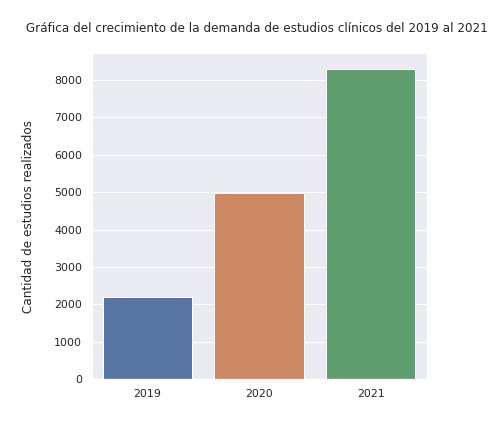

In [ ]:
#Usar un estilo de grilla
sns.set()
fig = plt.figure(figsize =(6, 6)) 
sns.countplot(data=df, x='Periodo')

#Parámetros de la gráfica
plt.title('\n Gráfica del crecimiento de la demanda de estudios clínicos del 2019 al 2021  \n')
plt.xlabel('\n ')
plt.ylabel('\n Cantidad de estudios realizados \n')
plt.xticks(rotation = 0);
plt.savefig("Comparacion_estudios_total.jpg", dpi=100, bbox_inches='tight') #Guardamos la gráfica

Creando la tabla de los 10 estudios más solicitados en cada uno de los 3 años

In [ ]:
#df19.groupby(['Estudio'])[['Cantidad']].sum()#(by='Cantidad', ascending= False).head(10)

estudios_top =pd.DataFrame()
estudios_top_19 = df19.groupby(['Estudio', 'Periodo'])[['Cantidad']].sum().sort_values(by='Cantidad', ascending= False).head(10).reset_index()
estudios_top_20 = df20.groupby(['Estudio', 'Periodo'])[['Cantidad']].sum().sort_values(by='Cantidad', ascending= False).head(10).reset_index()
estudios_top_21 = df21.groupby(['Estudio', 'Periodo'])[['Cantidad']].sum().sort_values(by='Cantidad', ascending= False).head(10).reset_index()

pd.concat([estudios_top_19, estudios_top_20, estudios_top_21], axis=1)

,Estudio,Periodo,Cantidad,Estudio,Periodo,Cantidad,Estudio,Periodo,Cantidad
0,CITOMETRIA HEMATICA COMPLETA,2019,413,CITOMETRIA HEMATICA COMPLETA,2020,1069,PRUEBA DE CONTAGIO COVID,2021,1690
1,EXAMEN GENERAL DE ORINA,2019,282,EXAMEN GENERAL DE ORINA,2020,596,EXAMEN GENERAL DE ORINA,2021,871
2,QUIMICA SANGUINEA COMPLETA (7 ELEMENTOS),2019,246,QUIMICA SANGUINEA COMPLETA (7 ELEMENTOS),2020,542,CITOMETRIA HEMATICA COMPLETA,2021,856
3,PRUEBA DE EMBARAZO (PIE),2019,110,PRUEBA DE EMBARAZO (PIE),2020,302,QUIMICA SANGUINEA COMPLETA (7 ELEMENTOS),2021,737
4,GRUPO SANGUINEO Y RH,2019,88,HEMOGLOBINA GLUCOSILADA,2020,212,HEMOGLOBINA GLUCOSILADA,2021,474
5,HEMOGLOBINA GLUCOSILADA,2019,72,DENGUE NS1 Igg e Igm,2020,194,PRUEBA DE EMBARAZO (PIE),2021,377
6,GLUCOSA SERICA,2019,56,PRUEBA COVID ANTICUERPOS,2020,147,PRUEBA COVID ANTICUERPOS,2021,264
7,QUIMICA SANGUINEA PARCIAL,2019,46,PRUEBA DE CONTAGIO COVID,2020,119,"DIMERO ""D""",2021,253
8,VIH (CUALITATIVA),2019,38,QUIMICA SANGUINEA DE 10 ELEMENTOS,2020,102,QUIMICA SANGUINEA DE 10 ELEMENTOS,2021,201
9,REACCIONES FEBRILES,2019,38,GLUCOSA SERICA,2020,93,GRUPO SANGUINEO Y RH,2021,164


## 7. Comparando la cantidad de estudios realizados por género del 2019 al 2021

Creación del dataframe con la cantidad de estudios realizados por género de cada año

In [ ]:
#Hacemos un groupby del dataframe df_genero
porcentajes_genero = df_genero.groupby(['Periodo'])[['Genero_Femenino', 'Genero_Masculino']].sum()

#Usamos el metódo transpose() para pasar nuestras columnas como filas
porcentajes_genero = porcentajes_genero.transpose()
porcentajes_genero

Periodo,2019,2020,2021
Genero_Femenino,1412,2870,4811
Genero_Masculino,794,2100,3487


Creamos un dataframe con el incremento porcentual de la cantidad de estudios realizados por género

In [ ]:
pociento_incr_genero = pd.DataFrame()
pociento_incr_genero['2019-2020'] = (porcentajes_genero['2020']-porcentajes_genero['2019'])/(porcentajes_genero['2019'])*(100)
pociento_incr_genero['2020-2021'] = (porcentajes_genero['2021']-porcentajes_genero['2020'])/(porcentajes_genero['2020'])*(100)
pociento_incr_genero 

,2019-2020,2020-2021
Genero_Femenino,103.257790,67.630662
Genero_Masculino,164.483627,66.047619


In [ ]:
porcentaje_19 = (1412- 796)/(796)*100  #(8669- 2206)/(2206)*100
print("El porcentaje de mujeres que se realizaron algún tipo de análisis en el 2019 es del " f"{porcentaje_19 :.2f}%")

porcentaje_20 = (2870-2100)/(2100)*100
print("El porcentaje que representan las mujeres que se realizaron algún tipo de estudio clínico en el 2020 es del " f"{porcentaje_20 :.2f}%")

porcentaje_21 = (4811-3487)/(3487)*100
print("El porcentaje que representan l1as mujeres que se realizaron algún tipo de estudio clínico en el 2020 es del " f"{porcentaje_21 :.2f}%")

porcentaje_fem_20 = (2870-1412 )/(1412)*100
print("El incremento del genero femenino en la demanda de ánálisis clínicos del 2019 al 2020 fue de " f"{porcentaje_fem_20 :.2f}%")

porcentaje_fem_21 = (4811-2870)/(2870)*100
print("El incremento del genero femenino en la demanda de ánálisis clínicos del 2020 al 2021 fue de " f"{porcentaje_fem_21 :.2f}%")

porcentaje_mas_20 = (2100-794)/(794)*100
print("El incremento del genero masculino en la demanda de ánálisis clínicos del 2020 al 2021 fue de " f"{porcentaje_mas_20 :.2f}%")

porcentaje_mas_21 = (3487-2100)/(2100)*100
print("El incremento del genero masculino en la demanda de ánálisis clínicos del 2020 al 2021 fue de " f"{porcentaje_mas_21 :.2f}%")

El porcentaje de mujeres que se realizaron algún tipo de análisis en el 2019 es del 77.39%
El porcentaje que representan las mujeres que se realizaron algún tipo de estudio clínico en el 2020 es del 36.67%
El porcentaje que representan l1as mujeres que se realizaron algún tipo de estudio clínico en el 2020 es del 37.97%
El incremento del genero femenino en la demanda de ánálisis clínicos del 2019 al 2020 fue de 103.26%
El incremento del genero femenino en la demanda de ánálisis clínicos del 2020 al 2021 fue de 67.63%
El incremento del genero masculino en la demanda de ánálisis clínicos del 2020 al 2021 fue de 164.48%
El incremento del genero masculino en la demanda de ánálisis clínicos del 2020 al 2021 fue de 66.05%


Creamos una gráfica que compare la cantidad de estudios realizados por género en cada año

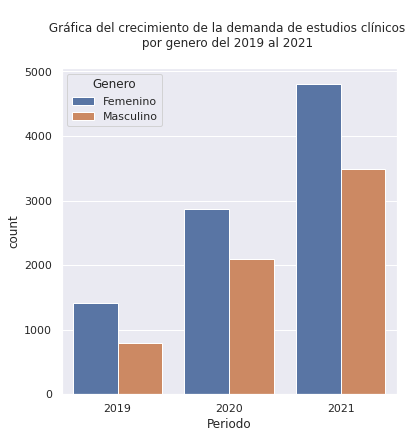

In [ ]:
#Usar un estilo de grilla
sns.set()

#Parámetros de la gráfica
fig = plt.figure(figsize =(6, 6)) 
plt.title('\n Gráfica del crecimiento de la demanda de estudios clínicos  \n por genero del 2019 al 2021  \n')
sns.countplot(data=df, x='Periodo', hue='Genero')
plt.savefig("Comparacion_estudios__genero_año.jpg", dpi=100, bbox_inches='tight')
plt.show()

Creación de gráfica tipo "pie" comparando el porcentaje de estudios realizados entre los dos géneros en el 2019

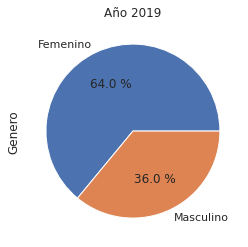

In [ ]:
df19['Genero'].value_counts().plot(kind='pie',   autopct="%0.1f %%", title='Año 2019');
plt.savefig("Comparación_en_porcentaje_2019.jpg", dpi=100, bbox_inches='tight')

Creación de gráfica tipo "pie" comparando el porcentaje de estduios realizados entre los dos géneros en el 2020

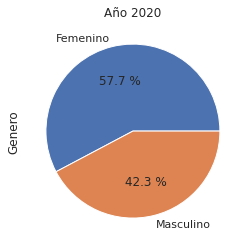

In [ ]:
df20['Genero'].value_counts().plot(kind='pie',   autopct="%0.1f %%", title='Año 2020');
plt.savefig("Comparación_en_porcentaje_2020.jpg", dpi=100, bbox_inches='tight')

Creación de gráfica tipo "pie" comparando el porcentaje de estduios realizados entre los dos géneros en el 2021

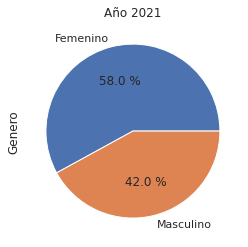

In [ ]:
df21['Genero'].value_counts().plot(kind='pie', autopct="%0.1f %%", title='Año 2021');
plt.savefig("Comparación_en_porcentaje_2021.jpg", dpi=100, bbox_inches='tight')

Gráfica para comparar el crecimiento que ha tenido cada género en los 3 años 

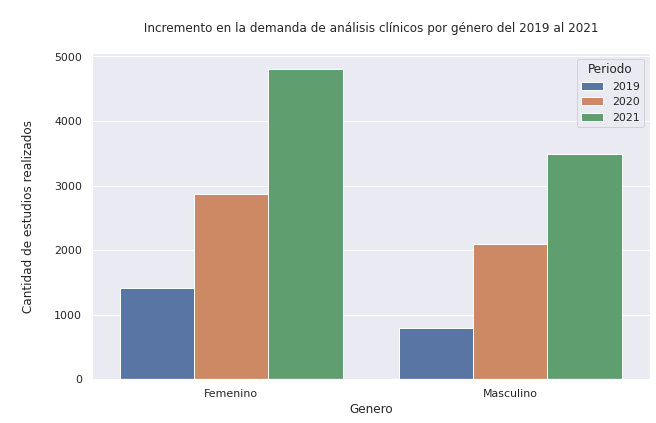

In [ ]:
fig = plt.figure(figsize =(10, 6))
sns.countplot(data=df, x='Genero', hue='Periodo')
plt.title('\n Incremento en la demanda de análisis clínicos por género del 2019 al 2021 \n')
plt.ylabel('\n Cantidad de estudios realizados \n')
plt.savefig("Comparativo_por_genero_año.jpg", dpi=150, bbox_inches='tight')
plt.show()

## 8. Comparación de cantidad de estudios realizados mensualmente en los 3 años

In [ ]:
df.head()

,Clave,Estudio,Costo_dlls,Fecha,Genero,Cantidad,Periodo,Mes,Dia
0,MX-0843,PAPANICOLAU,14.5,2019-08-30,Femenino,1,2019,8,30
1,MX-0843,PAPANICOLAU,14.5,2019-11-21,Femenino,1,2019,11,21
2,MX-0843,PAPANICOLAU,14.5,2019-12-02,Femenino,1,2019,12,2
3,MX-0843,PAPANICOLAU,14.5,2019-12-17,Femenino,1,2019,12,17
4,MX-0843,PAPANICOLAU,14.5,2019-08-14,Femenino,1,2019,8,14


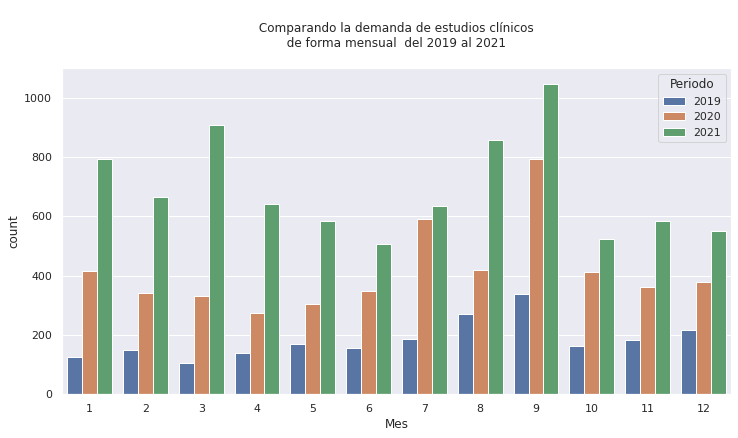

In [ ]:
#Parámetros de la gráfica
sns.set()
fig = plt.figure(figsize =(12, 6)) 
sns.countplot(data=df, x='Mes', hue='Periodo')
plt.title('\n Comparando la demanda de estudios clínicos \n  de forma mensual  del 2019 al 2021  \n')
plt.savefig("Comparacion_cantidad__mensual.jpg", dpi=100, bbox_inches='tight'); #Guardamos la gráfica

## 9. Visualizamos el historico de la demanda de estudios clínicos del 2019 al 2021 de forma mensual

Creación del dataframe de la cantidad de estudios realizados mensualmente

In [ ]:
#Creamos nuestro dataframe para visualizar el historico
df_mensual = df.groupby(['Fecha'])[['Cantidad']].sum().reset_index()

#A nuestro Dataframe le aplicamos el metodo .set_index() que pondra como indice principal a la variable 'Fecha'
df_mensual = df_mensual.set_index('Fecha')

#Con el metodo .resample('m').sum() vamos a sumar la cantidad de estudios por mes 
df_mensual = df_mensual.resample('m').sum().reset_index()

#Obtenemos nuestro dataframe de los 3 años con al suma de lso estudios realizados de forma mensual
df_mensual.index=df_mensual.index+1
df_mensual.head()

,Fecha,Cantidad
1,2019-01-31,125
2,2019-02-28,151
3,2019-03-31,107
4,2019-04-30,140
5,2019-05-31,168


Creación de la gráfica del historico

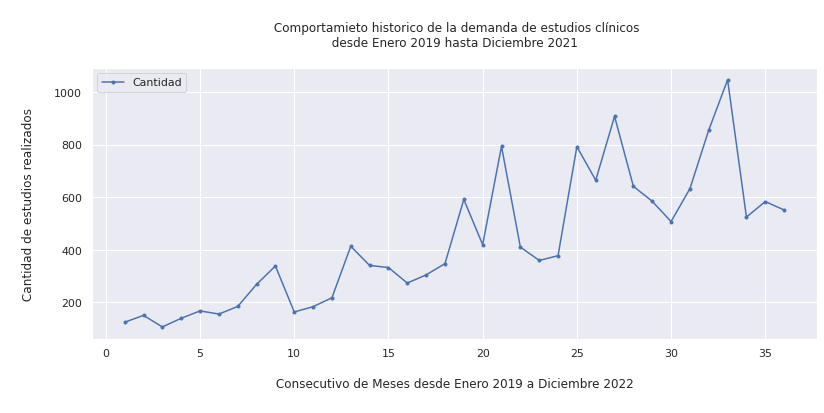

In [ ]:
#Parametros de la Gráfica
df_mensual.plot(kind="line",  y='Cantidad', marker = '.',figsize=(13,5))
plt.title('\n Comportamieto historico de la demanda de estudios clínicos\n  desde Enero 2019 hasta Diciembre 2021  \n')

plt.xlabel('\n Consecutivo de Meses desde Enero 2019 a Diciembre 2022 \n')
plt.ylabel('\n Cantidad de estudios realizados \n')
plt.savefig("Historico_mensual_3_años.jpg", dpi=300, bbox_inches='tight')
plt.xticks(rotation = 0);
plt.show()

## 10. Visualización del comportamiento de la demanda de estudios clínicos por mes durante los 3 años 

In [ ]:
#Creamos nuestro groupby con "Peridos", "Mes" y .sum para sumar la cantidad
df_years = df.groupby(['Periodo','Mes'])[['Cantidad']].sum().reset_index()

In [ ]:
#Creamos el dataframe con los valores por mes y año para graficarlo, los datos fueron extraidos
#del groupby anterior
datos = [[125, 151, 107, 140, 168, 156, 185, 269, 339, 164, 184, 218,],
        [415, 344, 335, 275, 305, 349, 592, 421, 833, 416, 363, 384,],
        [826, 702, 964, 684, 600, 520, 654, 890, 1101, 557, 603, 568]]
columnas = [['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']] # definimos los nombres de las columnas
filas = ['2019', '2020', '2021'] # definimos los nombres de las filas

#Creamos nuestro dataframe
df_years = pd.DataFrame(datos, columns=columnas, index=filas).transpose()
df_years.head()

,2019,2020,2021
Ene,125,415,826
Feb,151,344,702
Mar,107,335,964
Abr,140,275,684
May,168,305,600


In [ ]:
df_years.describe()

,2019,2020,2021
count,12.000000,12.000000,12.000000
mean,183.833333,419.333333,722.416667
std,64.864661,152.859611,183.030280
min,107.000000,275.000000,520.000000
25%,148.250000,341.750000,592.000000
50%,166.000000,373.500000,669.000000
75%,193.250000,417.250000,842.000000
max,339.000000,833.000000,1101.000000


Creación de una gráfica lineal para visualizar el comportamiento de la demanda mensual de estudios clínicos en cada año

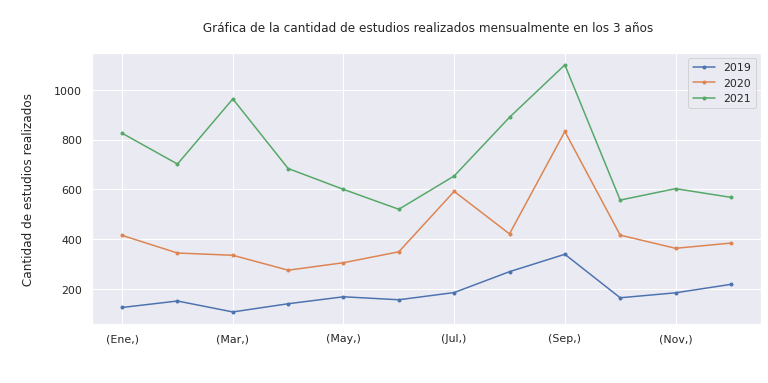

In [ ]:
#Parámetros de la gráfica
df_years[['2019','2020','2021']].plot(kind ='line',  marker = '.',figsize=(12,5))
plt.title('\n Gráfica de la cantidad de estudios realizados mensualmente en los 3 años\n')
plt.xlabel('\n ')
plt.ylabel('\n Cantidad de estudios realizados \n')
plt.savefig("Comparativo_mensual_3_años.jpg", dpi=300, bbox_inches='tight')
plt.xticks(rotation = 0);

## 11. Creamos una gráfica de área para visualizar el comportamiento de cada mes para los 3 años

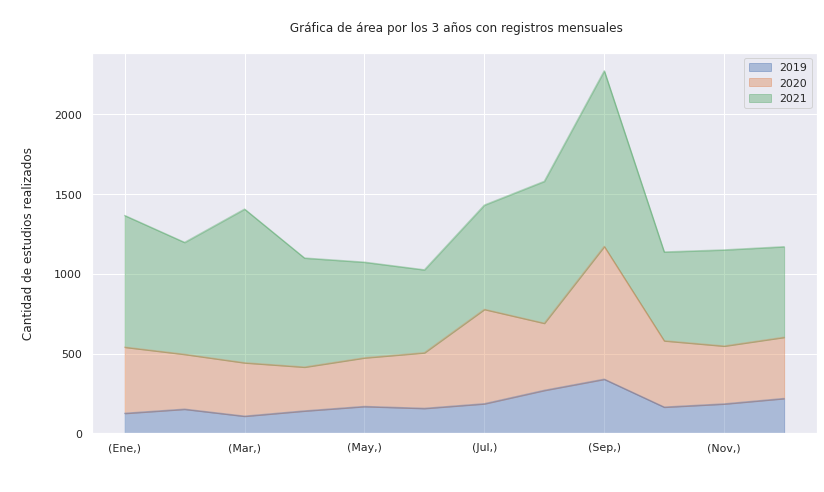

In [ ]:
#Gráfica de área de los 3 años
df_years.plot.area(alpha=0.4, figsize=(13,7))
plt.title('\n Gráfica de área por los 3 años con registros mensuales\n')
plt.xlabel('\n ')
plt.ylabel('\n Cantidad de estudios realizados \n')
plt.savefig("Grafica_de_area_3_periodos.jpg", dpi=300, bbox_inches='tight')
plt.xticks(rotation = 0);



---

